In [ ]:
import numpy as np
import cv2, sys
from matplotlib import pyplot as plt
%matplotlib inline
cv2.ocl.setUseOpenCL(False)

plt.rcParams['figure.figsize'] = (15,10)

In [54]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

In [55]:
img1 = to_gray(cv2.imread("30.jpg"))      # queryImage
img2 = to_gray(cv2.imread('31.jpg')) # trainImage

In [56]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# sift = cv2.S

In [57]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [62]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=10)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

In [63]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches))]

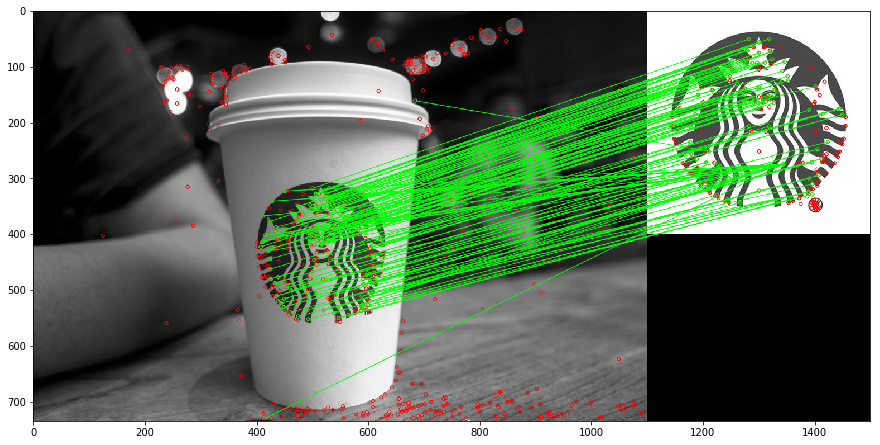

(<matplotlib.image.AxesImage at 0x7f567d206e90>, None)

In [65]:
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

# img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None, matchesMask= matchesMask, flags=2)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None, **draw_params)
plt.imshow(img3,),plt.show()